# **Importing libraries and data set**


In [50]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'colab'


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load and prepare data

In [53]:
df1 = pd.read_csv("/content/drive/MyDrive/Mental Fitness Tracker Dataset/mental-and-substance-use-as-share-of-disease -AI.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Mental Fitness Tracker Dataset/prevalence-by-mental-and-substance-use-disorder _AI.csv")

In [54]:
df1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [55]:
data = pd.merge(df1,df2)
data.head(10)

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779
5,Afghanistan,AFG,1995,1.738272,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422
6,Afghanistan,AFG,1996,1.778098,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837
7,Afghanistan,AFG,1997,1.781815,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938
8,Afghanistan,AFG,1998,1.729402,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665
9,Afghanistan,AFG,1999,1.850988,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428


In [56]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Pe

In [57]:
data.drop('Code',axis=1,inplace=True)

In [58]:
condition = data['Year'] == 1990
df = data[condition]
df

,Entity,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
30,African Region (WHO),1990,1.417621,0.216352,0.581938,0.102983,3.537832,0.437110,4.725167,1.152445
60,Albania,1990,4.340942,0.295964,0.569682,0.109189,3.851288,0.466142,2.506482,1.687598
90,Algeria,1990,4.346285,0.262470,0.793356,0.204024,4.852441,0.334826,4.460300,0.442386
120,American Samoa,1990,4.550356,0.329409,0.294143,0.147649,4.134174,0.739258,2.821861,0.718426
...,...,...,...,...,...,...,...,...,...,...
6690,World Bank Lower Middle Income,1990,2.264382,0.277116,0.421348,0.094743,3.313778,0.442726,3.882218,1.309755
6720,World Bank Upper Middle Income,1990,3.982181,0.301618,0.431699,0.116878,3.966773,0.724733,3.341486,1.671316
6750,Yemen,1990,1.997790,0.235977,0.740229,0.131646,4.863122,0.245125,4.950898,0.430373
6780,Zambia,1990,1.203320,0.210311,0.578861,0.101250,3.783025,0.444504,4.251512,1.570973


In [59]:
data.size,data.shape

(68400, (6840, 10))

In [60]:
group_by_countries = data.groupby('Entity')['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']
mean_entity = group_by_countries.mean()

# **Visualization**

<Figure size 300x300 with 0 Axes>

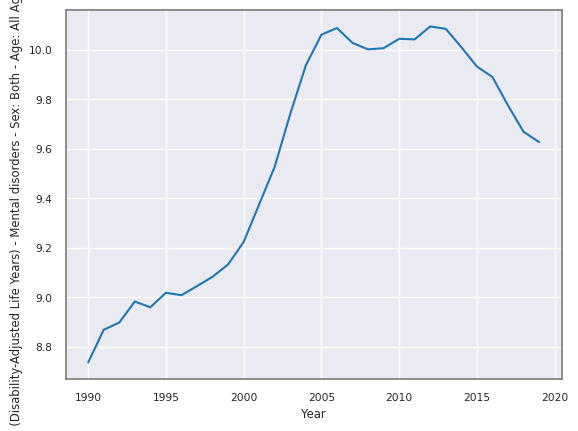

<Figure size 300x300 with 0 Axes>

In [61]:
aus = data[data['Entity'] == 'Australia']
custom_rc = {'axes.grid': True, 'axes.edgecolor': 'gray', 'lines.linewidth': 10}
sns.set_style('dark', rc=custom_rc)
sns.set_context(context='notebook', font_scale=0.7)

sns.lineplot(data=aus, x='Year', y='DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)')
plt.figure(figsize=(3,3))

In [ ]:
mean_entity

In [65]:
data1=dict(type='choropleth',
         colorscale='Hot',
         reversescale=True,
         locations=list(mean_entity.index),
         z=list(mean_entity.values),
         locationmode='country names',
         text=list(mean_entity.index),
         colorbar={'title': 'Mental Disability Scale'})

layout=dict(title='Mental Disability Average (1990-2019)',
           geo=dict(showframe=True,
                   projection={'type': 'natural earth'}))

choromap = go.Figure(data=[data1], layout=layout)
iplot(choromap, validate=False)

<ipython-input-66-a4a9f38844e6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[]

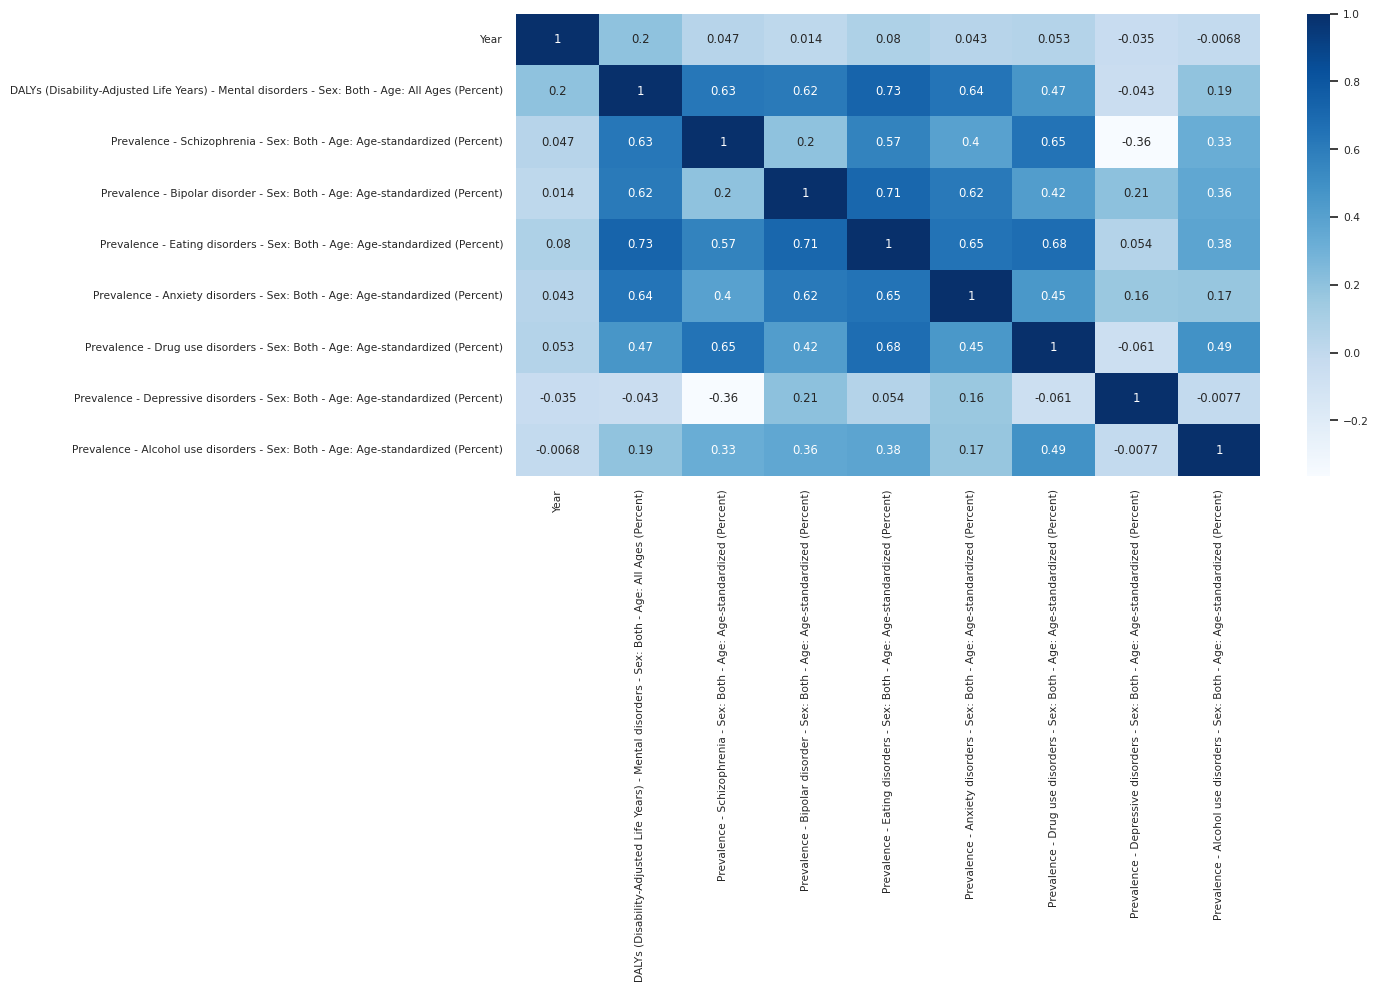

In [66]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

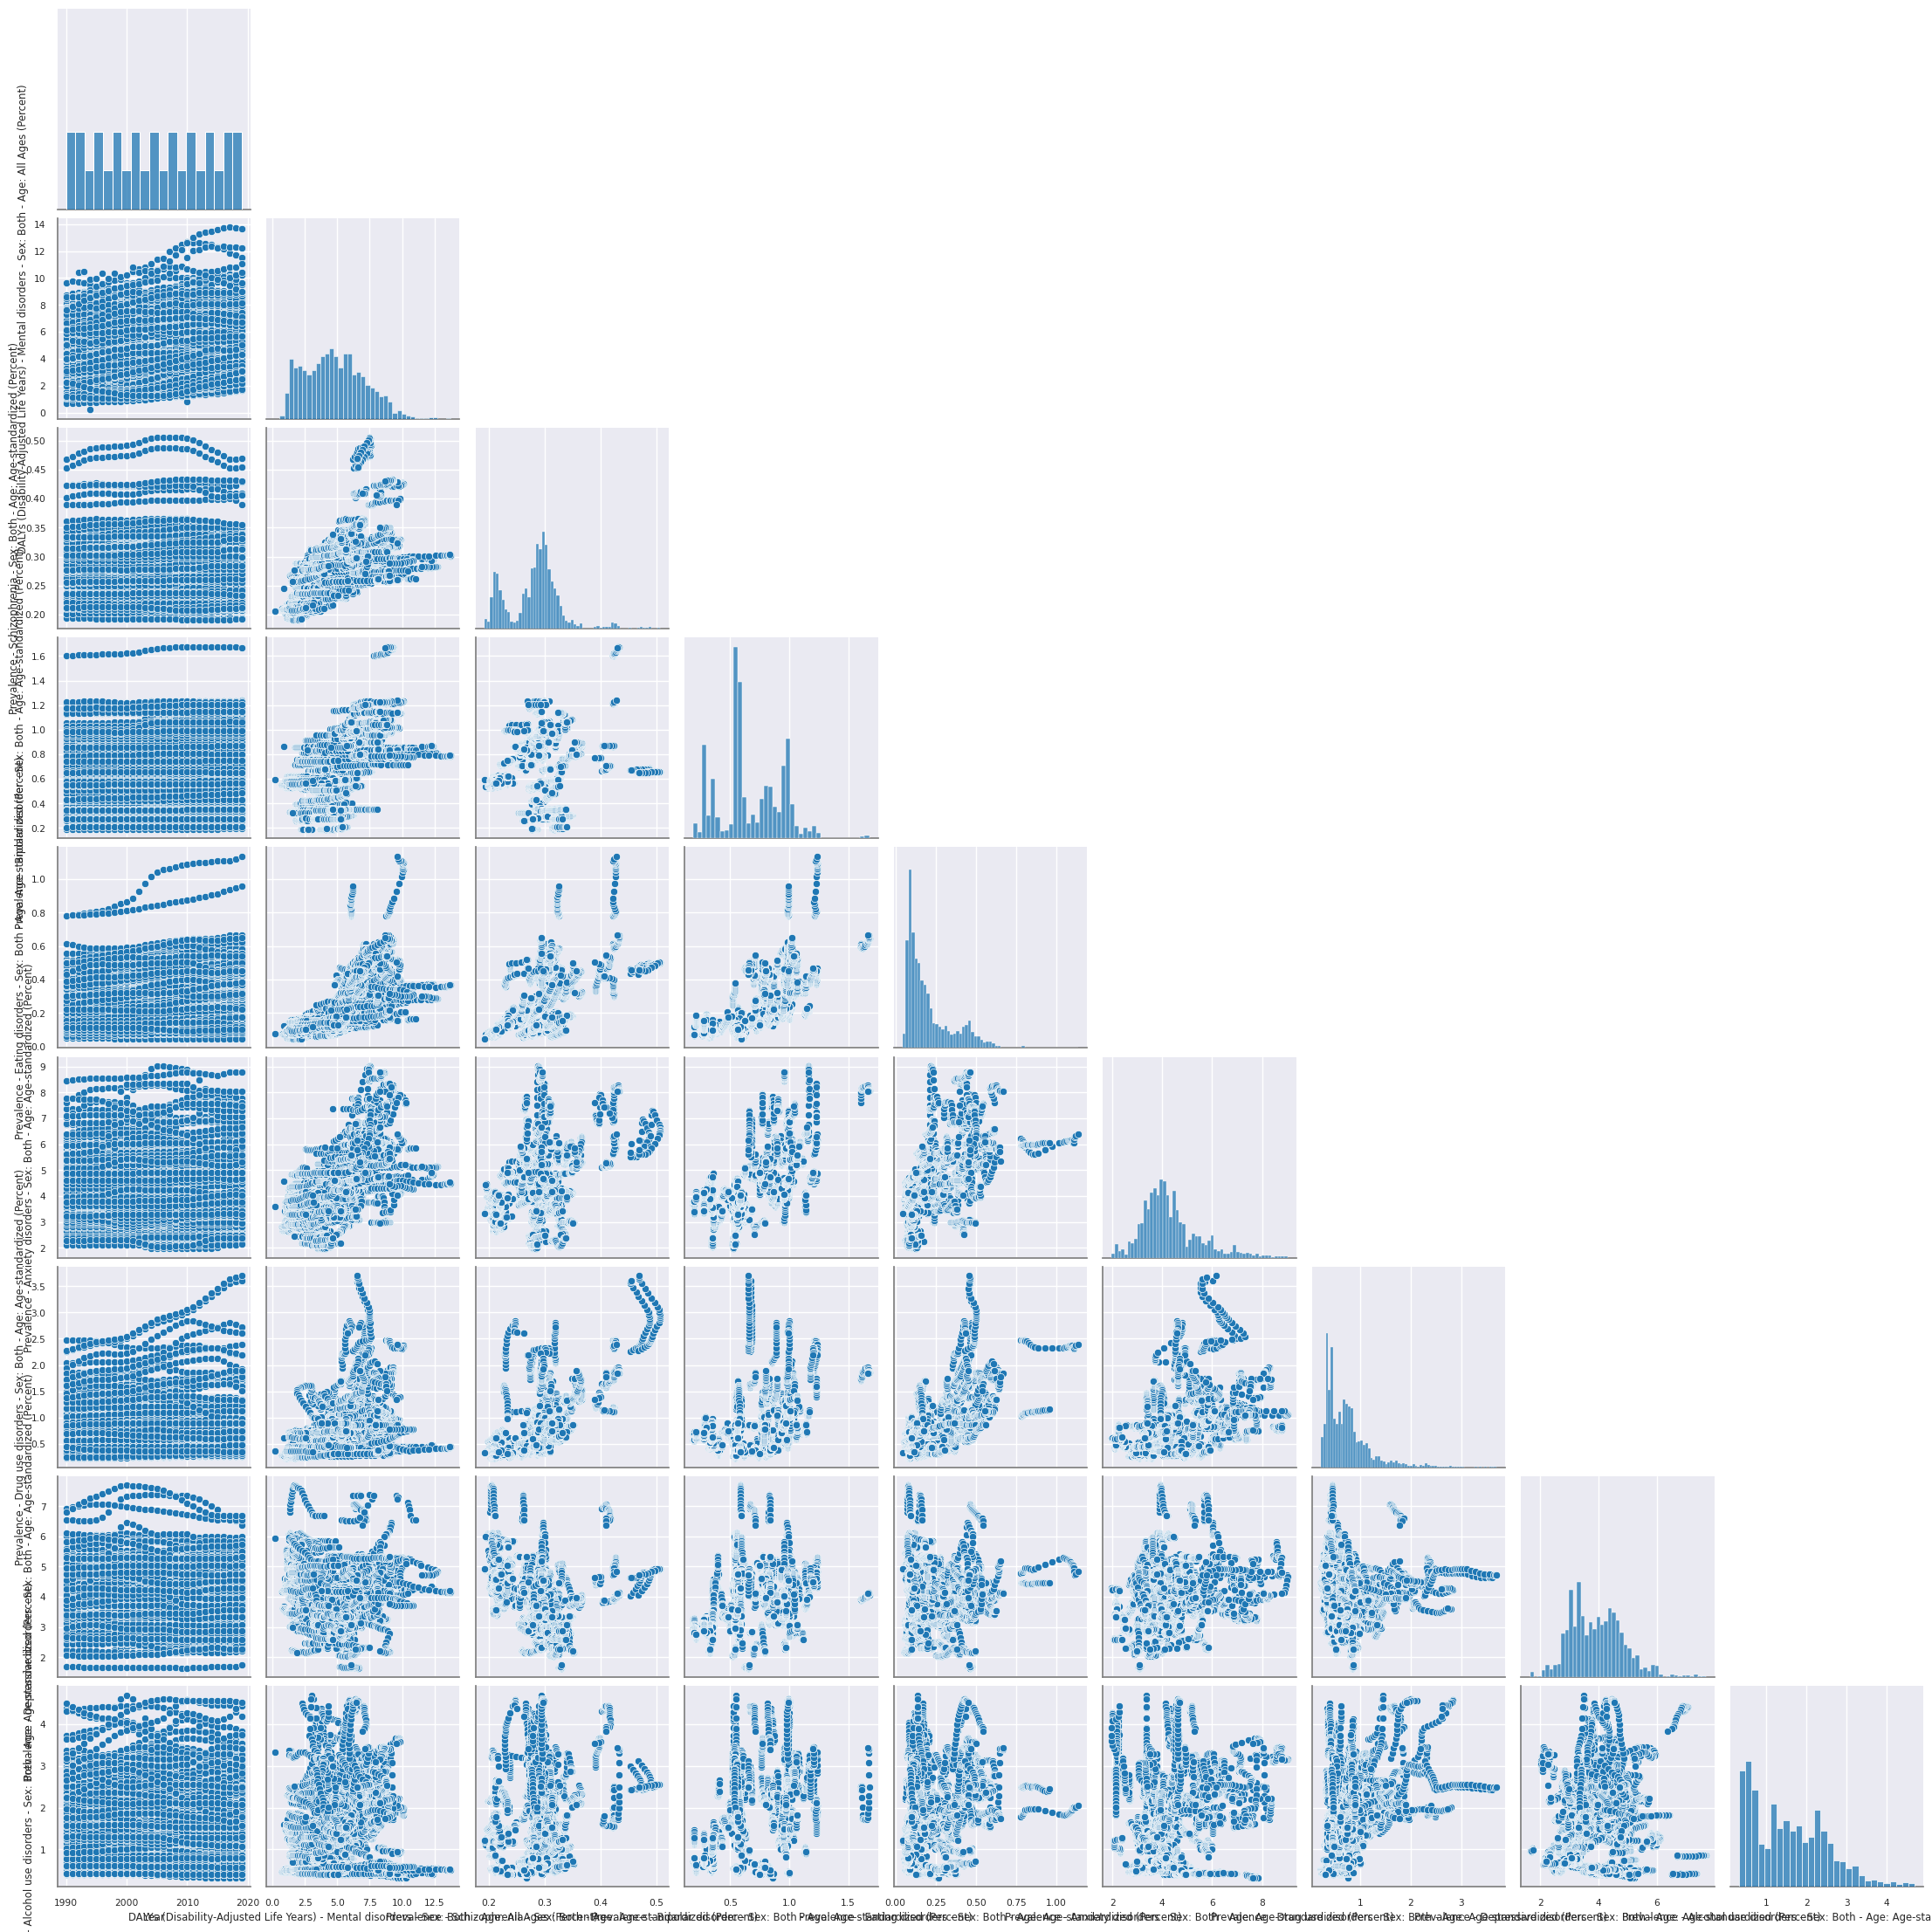

In [67]:
sns.pairplot(data,corner=True)
plt.show()

In [68]:
print(data)
mean = data['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].mean()

           Entity  Year  \
0     Afghanistan  1990   
1     Afghanistan  1991   
2     Afghanistan  1992   
3     Afghanistan  1993   
4     Afghanistan  1994   
...           ...   ...   
6835     Zimbabwe  2015   
6836     Zimbabwe  2016   
6837     Zimbabwe  2017   
6838     Zimbabwe  2018   
6839     Zimbabwe  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  \
0                                              1.696670                                                 
1                                              1.734281                                                 
2                                              1.791189                                                 
3                                              1.776779                                                 
4                                              1.712986                                                 
...                                          

In [69]:
fig = px.pie(data,values='DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',names = 'Year')
fig.show()

In [70]:
fig = px.bar(data.head(10),x='Year',y='DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',color='Year',template='ggplot2')
fig.show()

In [71]:
fig = px.line(data,x='Year',y='DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',markers=True,color='Entity',color_discrete_sequence=['blue','red'])
fig.show()

In [72]:
df = data.copy()

In [73]:
df.head(10)

,Entity,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779
5,Afghanistan,1995,1.738272,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422
6,Afghanistan,1996,1.778098,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837
7,Afghanistan,1997,1.781815,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938
8,Afghanistan,1998,1.729402,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665
9,Afghanistan,1999,1.850988,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Year                                                                                             6840 non-null   int64  
 2   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                      6840 non-null   float64
 5   Preval

In [75]:
# Transform non numeric labels to numeric labels

from sklearn.preprocessing import LabelEncoder  # LabelEncoder used to normalize labels
l=LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object': # transform non- numerical labels (as long as they are hashable and comparable) to numerical labels
    df[i] = l.fit_transform(df[i])

In [76]:
df.shape

(6840, 10)

In [77]:
x = df.drop('DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',axis=1)
y = df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size =20,random_state=2)


In [78]:
print("xtrain: ",xtrain.shape)
print("xtest: ",xtest.shape)
print("\n ytrain: ",ytrain.shape)
print("ytest: ",ytest.shape)

xtrain:  (6820, 9)
xtest:  (20, 9)

 ytrain:  (6820,)
ytest:  (20,)


# Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(xtrain,ytrain)

ytrain_pred = lr.predict(xtrain)

mse = mean_squared_error(ytrain,ytrain_pred)

rmse = (np.sqrt(mean_squared_error(ytrain,ytrain_pred)))

r2 = r2_score(ytrain,ytrain_pred)

print("The Linear Regression model preformance for training set")
print("----------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The Linear Regression model preformance for training set
----------------------------------------
MSE is 1.3399913707005786
RMSE is 1.1575799629833692
R2 is 0.7453536323041361


# Random Forest Regressor Model

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

ytrain_pred = rf.predict(xtrain)
mse = mean_squared_error(ytrain,ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
r2 = r2_score(ytrain,ytrain_pred)

print("The random forest regressor model performance for training set")
print("----------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The random forest regressor model performance for training set
----------------------------------------
MSE is 0.0038108756146377643
RMSE is 0.06173228988655584
R2 is 0.9992757971027075


# Evaluation

In [81]:
ytest_pred = lr.predict(xtest)
mse = mean_squared_error(ytest,ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest,ytest_pred)))
r2 = r2_score(ytest,ytest_pred)

print("The Linear regression model performance for testing set")
print("----------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

ytest_pred = rf.predict(xtest)
mse = mean_squared_error(ytest,ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest,ytest_pred)))
r2 = r2_score(ytest,ytest_pred)

print("\n \nThe random forest regression model performance for testing set")
print("----------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The Linear regression model performance for testing set
----------------------------------------
MSE is 0.9579258659002294
RMSE is 0.9787368726579322
R2 is 0.8132599804568195

 
The random forest regression model performance for testing set
----------------------------------------
MSE is 0.008854824580381799
RMSE is 0.09410007747277256
R2 is 0.9982738224594886
